**Import library need by the project**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read data from CSV file**

In [57]:
houses = pd.read_csv('./data/house_data.csv', sep=',')

houses.head(10)

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET
0,Condo/Co-op,Plan 6 Plan,Sunnyvale,94089,1804990,3,3.5,Sunnyvale,1844.0
1,Condo/Co-op,188 W Saint James St #11004,San Jose,95110,890000,2,2.0,SAN JOSE,1135.0
2,Other,746 Tunitas Creek Rd,Half Moon Bay,94019,3436400,3,2.0,HALF MOON BAY,1608.0
3,Single Family Residential,3886 Ross Rd,Palo Alto,94303,6188000,5,5.5,PALO ALTO,3669.0
4,Multi-Family (5+ Unit),160 N Claremont St,San Mateo,94401,1900000,9,5.0,SAN MATEO,4145.0
5,Condo/Co-op,200 Brannan St #407,San Francisco,94107,1349000,2,2.0,SF District 9,1525.0
6,Condo/Co-op,38228 Paseo Padre Pkwy #24,Fremont,94536,599000,2,2.0,FREMONT,933.0
7,Townhouse,92 Ryland Park Way,San Jose,95110,1128000,3,2.5,CENTRAL SAN JOSE,1512.0
8,Condo/Co-op,520 Chestnut St #301,San Francisco,94133,859000,1,1.0,SF District 8,868.0
9,Condo/Co-op,2040 Franklin St #1209,San Francisco,94109,1395000,2,2.0,SF District 7,1177.0


**Evaluate data type**

In [58]:
obj = (houses.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (houses.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (houses.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 3
Float variables: 2


In [59]:
houses.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET
count,1378.000000,1.378000e+03,1378.000000,1378.000000,1373.000000
mean,94527.742380,1.629686e+06,3.079826,2.429608,1751.128186
std,437.902294,1.786266e+06,2.170178,1.736902,1330.432046
min,94010.000000,3.000000e+03,0.000000,1.000000,255.000000
25%,94108.000000,7.712500e+05,2.000000,2.000000,1077.000000
50%,94403.000000,1.289440e+06,3.000000,2.000000,1451.000000
75%,95051.000000,1.835500e+06,4.000000,3.000000,1972.000000
max,95148.000000,2.988000e+07,46.000000,46.000000,29358.000000


**Heatmap to help us to understand correlation**

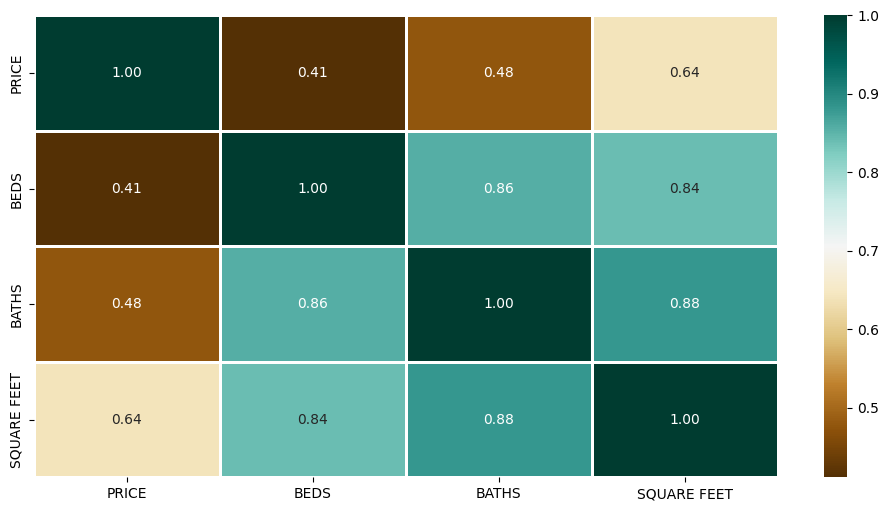

In [60]:
# Select only numerical features for correlation analysis
houses_numerical_dataset = houses.select_dtypes(include=['number'])
houses_numerical_dataset = houses_numerical_dataset.drop(columns=['ZIP OR POSTAL CODE'], errors='ignore')

plt.figure(figsize=(12, 6))
sns.heatmap(houses_numerical_dataset.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)
plt.show()

**Bar chart can help to analyze if the column helps**

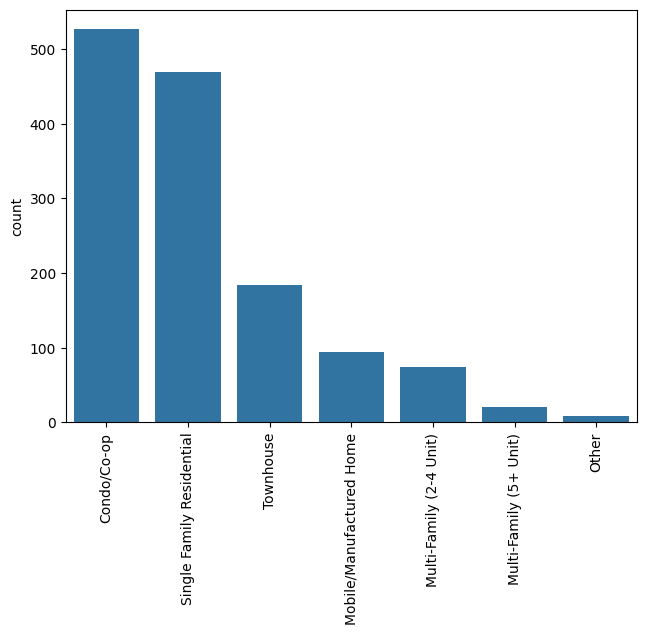

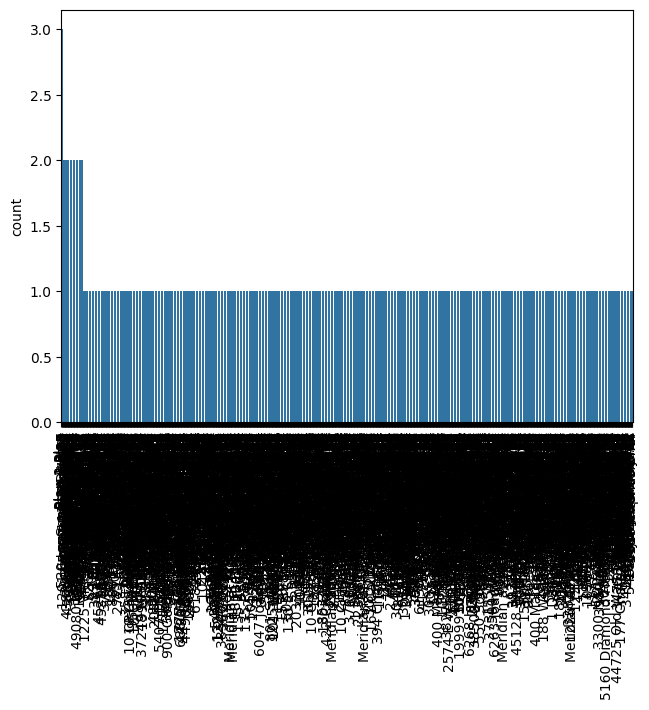

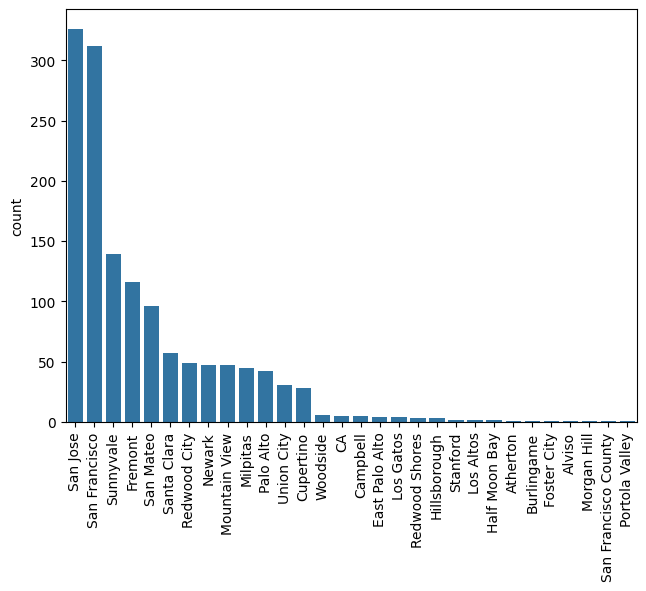

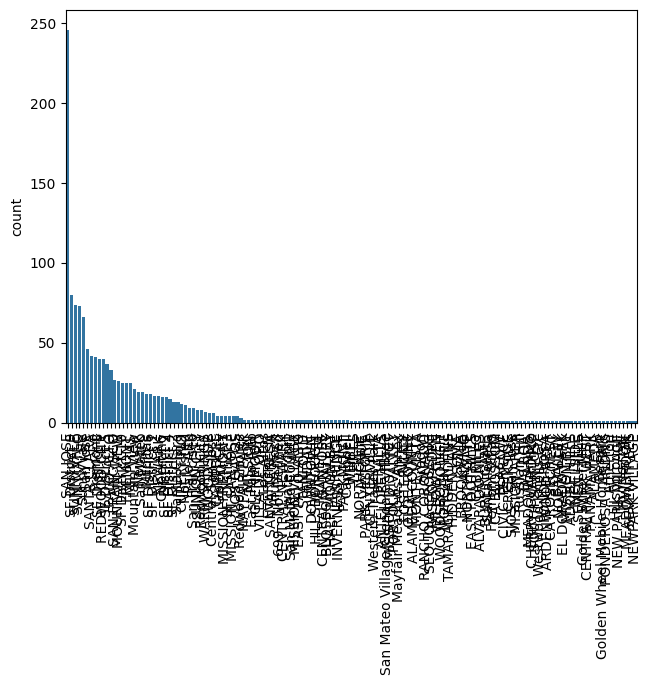

In [64]:
def plot_graph(data):
    plt.xticks(rotation=90)
    plt.tight_layout()
    sns.barplot(x = list(data.index), y = data)
    plt.show()

for col in object_cols:
    y = houses[col].value_counts()
    plot_graph(y)